In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

01/15/2019 16:19:21 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/15/2019 16:19:23 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-music_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/15/2019 16:19:25 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-nonmusic_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/15/2019 16:19:27 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-music

In [6]:
dtfa.load_state('data/lepping_2017_k100_n1000_01152019_155445')

In [7]:
dtfa.normalize_activations()

[tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690

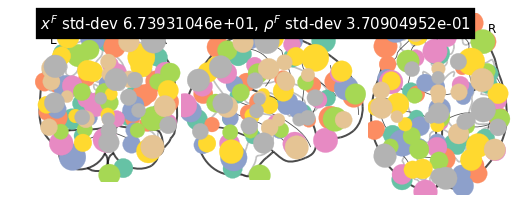

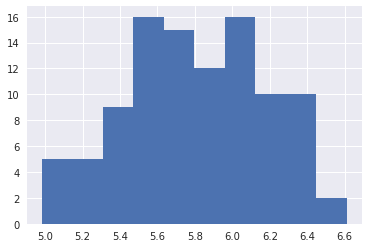

(<nilearn.plotting.displays.OrthoProjector at 0x7f8f098864a8>,
 tensor([[-3.7982e+01, -9.5708e+01, -9.9887e+00],
         [ 5.4074e+01,  1.5646e+01, -2.9619e+00],
         [-7.5273e-01,  4.1154e+01,  1.2706e+01],
         [-2.2755e+01, -2.9986e+01,  3.8937e+01],
         [ 1.5720e+01, -5.8392e+01, -6.1619e+01],
         [ 4.9385e+01, -5.2615e+01,  5.6673e+01],
         [-2.8177e+01, -3.6882e+01, -2.7700e+01],
         [-4.2683e-01,  3.7265e+01,  7.3185e+01],
         [-2.8492e+01, -2.8764e+00,  6.3487e+00],
         [ 2.5061e+01, -5.3148e+01,  1.5421e+01],
         [ 2.0321e+01, -6.1296e+01, -8.7917e+00],
         [ 5.2549e+01,  4.4718e+00,  5.4941e+01],
         [-4.7897e+01, -4.8416e+01,  5.9000e+01],
         [ 6.5188e+00, -7.3812e+01,  6.6325e+01],
         [-2.2605e+01, -5.7230e+00,  3.2893e+01],
         [-5.5353e+01,  4.4563e+01, -8.0952e+00],
         [ 3.5937e+01,  6.9033e+01,  1.4485e+01],
         [ 4.1499e+01, -8.9273e+01,  1.6947e+01],
         [ 5.0140e+01,  4.9284e+01,  

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [19]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    elif block.task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif block.task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = block.task.capitalize()
    return task

In [20]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

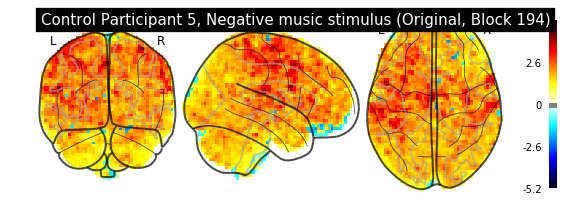

01/15/2019 16:34:18 Reconstruction Error (Frobenius Norm): 6.15528687e+02 out of 8.25734985e+02


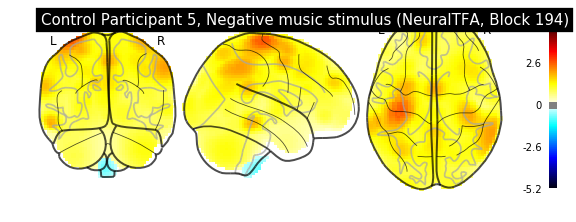

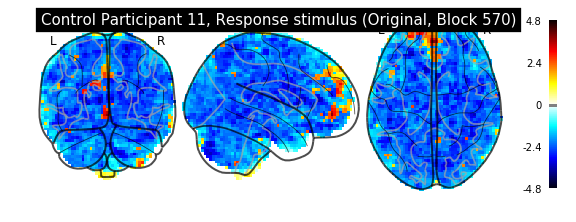

01/15/2019 16:34:20 Reconstruction Error (Frobenius Norm): 3.28264160e+02 out of 3.28105743e+02


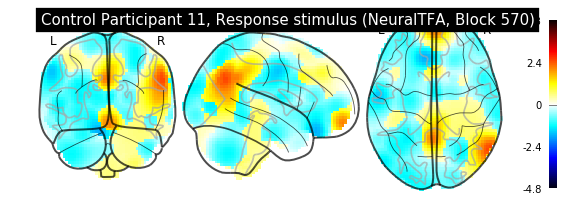

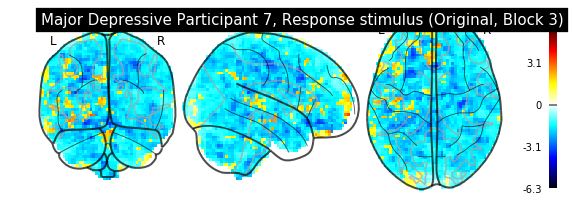

01/15/2019 16:34:22 Reconstruction Error (Frobenius Norm): 1.92875504e+02 out of 2.48567352e+02


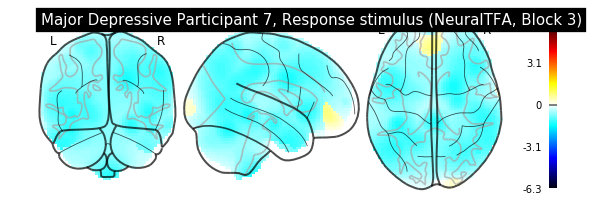

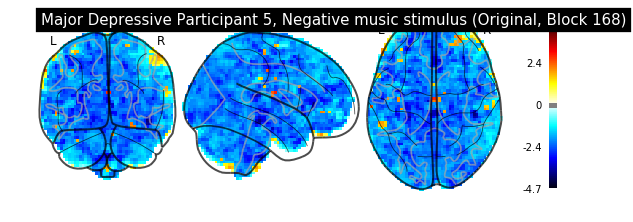

01/15/2019 16:34:25 Reconstruction Error (Frobenius Norm): 7.03173035e+02 out of 9.35257080e+02


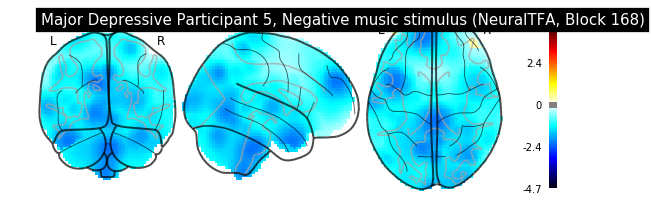

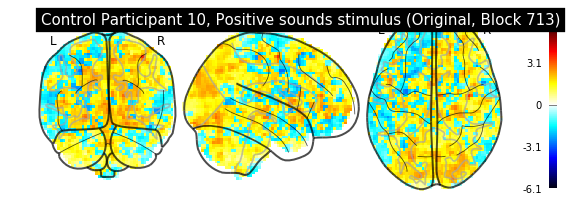

01/15/2019 16:34:28 Reconstruction Error (Frobenius Norm): 8.04247314e+02 out of 7.98788147e+02


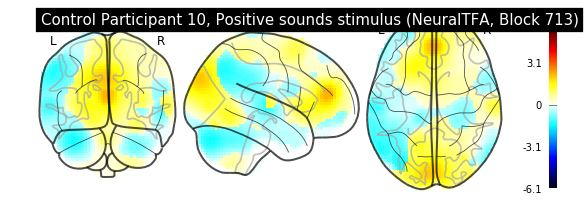

In [21]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


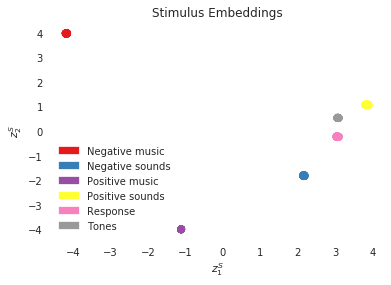

In [22]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


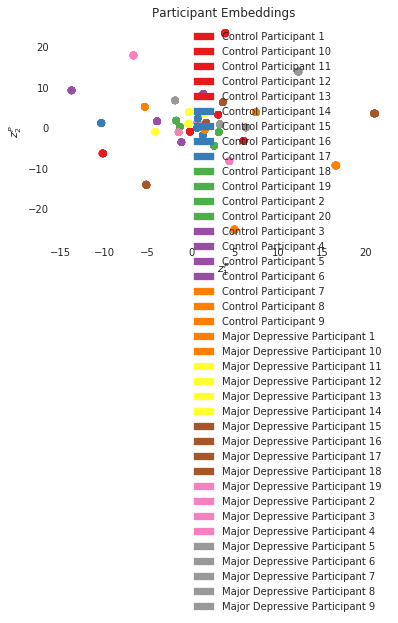

In [23]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

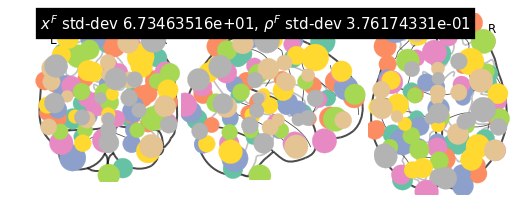

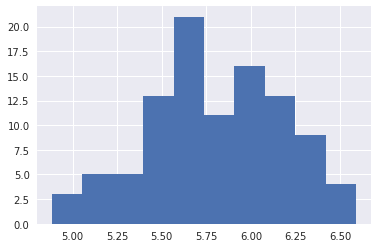

(<nilearn.plotting.displays.OrthoProjector at 0x7f8f0411eb70>,
 tensor([[-3.7372e+01, -9.5918e+01, -9.8055e+00],
         [ 5.3659e+01,  1.5631e+01, -3.0526e+00],
         [-3.3720e-01,  4.1510e+01,  1.2790e+01],
         [-2.2447e+01, -3.0453e+01,  3.8132e+01],
         [ 1.5358e+01, -5.8034e+01, -6.1630e+01],
         [ 4.9254e+01, -5.3009e+01,  5.5629e+01],
         [-2.8741e+01, -3.6726e+01, -2.8530e+01],
         [ 4.7935e-01,  3.6467e+01,  7.2183e+01],
         [-2.7899e+01, -2.9049e+00,  6.3788e+00],
         [ 2.4560e+01, -5.2268e+01,  1.5460e+01],
         [ 2.1148e+01, -6.0887e+01, -9.3434e+00],
         [ 5.2154e+01,  5.2192e+00,  5.4399e+01],
         [-4.7596e+01, -4.8223e+01,  5.9162e+01],
         [ 6.2526e+00, -7.3742e+01,  6.7139e+01],
         [-2.3772e+01, -6.5082e+00,  3.2610e+01],
         [-5.5757e+01,  4.4507e+01, -8.3116e+00],
         [ 3.5289e+01,  6.9300e+01,  1.3829e+01],
         [ 4.1438e+01, -8.9394e+01,  1.6744e+01],
         [ 4.9562e+01,  4.9721e+01,  

In [24]:
dtfa.visualize_factor_embedding()

In [25]:
dtfa.average_reconstruction_error()

01/15/2019 16:36:45 Average reconstruction error (MSE): 8.78135194e-01
01/15/2019 16:36:45 Average data norm (Euclidean): 9.55792772e-01
01/15/2019 16:36:45 Percent average reconstruction error: 0.349936


(0.8781351943312691, 0.9557927715365993, 0.003499362169706709)

In [26]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


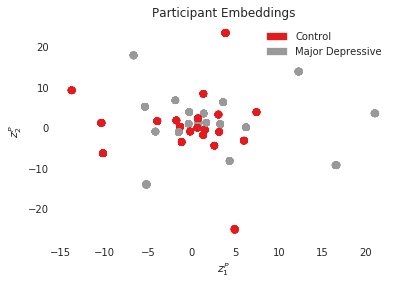

In [27]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)